## FKA122: H1a | Jonatan Haraldsson & Oscar Stommendal - group 19

### Import statements, constants and general functions

In [25]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as K
import pandas as pd

# Latex style
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=20)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
# Set ticks on both sides
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

# Constants
k_B = K.Boltzmann
e = K.elementary_charge
k_B /= e
n_atoms = 256

# Functions
def read_data(delta_t, its, its_eq, task, opt=None):
    if task == 2:
        filename = f'data/task_2/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 3:
        filename = f'data/task_3/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 4:
        filename = f'data/task_4/data_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 6:
        filename = f'data/task_4/rdist_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    elif task == 7:
        if opt is not None:
            filename = f'data/task_4/sfact_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}_{opt}.csv'
        else:
            filename = f'data/task_4/sfact_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
    if task not in [6, 7]:
        data_facts = np.genfromtxt(filename, dtype=np.float64, delimiter=',', max_rows=2)
        data = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')[3:, :]
        its, t_max, delta_t, its_eq, _, _, _, _ = data_facts[1]
        a_0, N_bins, N_max = None, None, None
    elif task == 6:
        data_facts = np.genfromtxt(filename, dtype=np.float64, delimiter=',', max_rows=2)
        data = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',', skip_header=2)
        N_bins = data.shape[1]
        its, its_eq, delta_t, a_0 = data_facts[1]
        t_max, N_max = None, None
    elif task == 7:
        data_facts = np.genfromtxt(filename, dtype=np.float64, delimiter=',', max_rows=2)
        data = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',', skip_header=2)
        N_bins = data.shape[1] - 1
        its, its_eq, delta_t, a_0, N_max, _ = data_facts[1]
        t_max = None

    return data, int(its), t_max, delta_t, int(its_eq), N_bins, a_0, N_max

def plot_trajs(its_eq, its, t_max, delta_t, task, save=True):

    def read_trajs():
        if task == 3:
            filename = f'data/task_3/trajs_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
        elif task == 4:
            filename = f'data/task_4/trajs_{delta_t:.3f}_{its:.0f}_{its_eq:.0f}.csv'
        trajs = np.genfromtxt(filename, dtype=np.float64, encoding=None, delimiter=',')

        return trajs[3:, :]

    trajs = read_trajs()

    fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)

    its_eq = 0
    t = np.linspace(0, t_max - t_max*its_eq/its, int(its-its_eq))

    axs[0][0].plot(t, trajs[its_eq:, 0], label='$x_1$')
    axs[0][0].plot(t, trajs[its_eq:, 1], label='$y_1$')
    axs[0][0].plot(t, trajs[its_eq:, 2], label='$z_1$')
    axs[0][0].set_title('Atom 1')

    axs[0][1].plot(t, trajs[its_eq:, 3], label='$x_2$')
    axs[0][1].plot(t, trajs[its_eq:, 4], label='$y_2$')
    axs[0][1].plot(t, trajs[its_eq:, 5], label='$z_2$')
    axs[0][1].set_title('Atom 2')

    axs[1][0].plot(t, trajs[its_eq:, 6], label='$x_3$')
    axs[1][0].plot(t, trajs[its_eq:, 7], label='$y_3$')
    axs[1][0].plot(t, trajs[its_eq:, 8], label='$z_3$')
    axs[1][0].set_title('Atom 3')

    axs[1][1].plot(t, trajs[its_eq:, 9], label='$x_4$')
    axs[1][1].plot(t, trajs[its_eq:, 10], label='$y_4$')
    axs[1][1].plot(t, trajs[its_eq:, 11], label='$z_4$')
    axs[1][1].set_title('Atom 4')

    for ax in axs.flatten():
        ax.legend(loc='upper right', ncol=3)
        y_min, y_max = ax.get_ylim()
        ax.set_ylim(y_min, y_max + 0.5 * (y_max - y_min))
    
    axs[0][0].set_ylabel('Position (Å)')
    axs[1][0].set_ylabel('Position (Å)')
    axs[1][0].set_xlabel('Time (ps)')
    axs[1][1].set_xlabel('Time (ps)')

    # if task == 3:
    #     fig.suptitle('\\textbf{{Atom Positions vs. Time | Solid State $\\vert\\approx 500^\\circ$}}\\text{{C}}')
    # elif task == 4:
    #     fig.suptitle('\\textbf{{Atom Positions vs. Time | Liquid State $\\vert\\approx 700^\\circ$}}\\text{{C}}')
    plt.tight_layout()

    return fig

def plot_T_E(data, its, its_eq, t_max, delta_t, save=True):
    
    def init_TE_fig():
        fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True)
        fig.subplots_adjust(hspace=0.05)  # adjust space between Axes
        ax1, ax2, ax3, ax4 = axs[0][0], axs[1][0], axs[0][1], axs[1][1]
        ax3.set_visible(False)
        ax4.set_visible(False)

        ax1_2 = fig.add_subplot(1, 2, 1, frameon=False)
        ax1_2.set_ylabel('Energy [eV]', labelpad=50)
        ax1_2.set_xticks([])
        ax1_2.set_yticks([])

        ax3 = fig.add_subplot(1, 2, 2)
        ax3.set_ylabel('Temperature [°C]', labelpad=10)
        plt.suptitle(f'\\textbf{{Energies and Temperature vs. time $\\vert \\hspace{{0.3cm}}\\Delta t = {delta_t}$ ps}}')

        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                    linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

        ax1.spines.bottom.set_visible(False)
        ax2.spines.top.set_visible(False)

        return fig, ax1, ax2, ax3, ax4

    t = np.linspace(0, t_max, int(its))
    E_k_min, E_k_max = np.min(data[1:, 0]), np.max(data[1:, 0])
    E_p_min, E_p_max = np.min(data[1:, 1]), np.max(data[1:, 1])

    fig, ax1, ax2, ax3, ax4 = init_TE_fig()

    ax1.plot(t, data[:, 0], label='Kinetic Energy', linewidth=3)
    ax1.plot(t, data[:, 1], label='Potential Energy', linewidth=3)
    ax1.plot(t, data[:, 2], label='Total Energy', linewidth=3)
    ax2.plot(t, data[:, 0], label='Kinetic Energy', linewidth=3)
    ax2.plot(t, data[:, 1], label='Potential Energy', linewidth=3)   
    ax2.plot(t, data[:, 2], label='Total Energy', linewidth=3)
    ax1.set_ylim(E_k_max - 0.75 * (E_k_max - E_k_min), E_k_max + 0.5 * (E_k_max - E_k_min))
    ax2.set_ylim(E_p_min - 0.1 * (E_p_max - E_p_min), E_p_max + 0.25 * (E_p_max - E_p_min))

    # y_min, y_max = ax2.get_ylim()
    # ax2.vlines(its_eq * delta_t, y_min+10, y_max-10, color='k', linestyle='--', alpha=0.5)
    # ax2.vlines(its_eq * delta_t, y_min+2, y_max-46, color='k', linestyle='--', alpha=0.5) 
    # ax2.text((its_eq + 1000) * delta_t, y_max-25, f'$t_{{eq}}$ = {int(its_eq*delta_t)} ps', ha='left')

    ax3.plot(t, data[:, 3] - 273.15, label='Temperature', color='tab:red', linewidth=3)
    # ax3.set_ylim(0, 1100)

    for ax in (ax2, ax3):
        ax.set_xlabel('Time [ps]')
        # ax.set_xticks([0, 25, 50])

    ax1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
    ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
    ax1.legend(fontsize=18, loc='upper right')
    ax3.legend(fontsize=18, loc='upper right')
    plt.tight_layout()

    return fig

def plot_T_P(data, its_eq, save=False):

    def init_TP_fig():
        fig, ax1 = plt.subplots(1, 1, figsize=(12, 10))
        ax2 = ax1.twinx()
        ax1.set_ylabel('Temperature [°C]', labelpad=10, color='tab:red')
        ax2.set_ylabel('Pressure [MPa]', labelpad=10, color='tab:blue')
        
        for ax in (ax1, ax2):
            if ax == ax1:
                ax.tick_params(axis='y', direction='in', length=5, width=1, colors='tab:red', right=False, pad=10)
            else:
                ax.tick_params(axis='y', direction='in', length=5, width=1, colors='tab:blue', left=False, pad=10)
            # ax.set_xticks([0, 10, 20, 30, 40, 50])

        return fig, ax1, ax2

    T_avg = data[:, 4] - 273.15 # Convert to Celsius
    P_avg = data[:, 6]
    t = np.linspace(0, t_max, its)

    fig, ax1, ax2 = init_TP_fig()

    ax1.plot(t, T_avg, color='tab:red', label='Temperature')
    ax2.plot(t, P_avg, color='tab:blue', label='Pressure')
    print(f'Average temperature: {np.mean(T_avg[20000:]):.3f} °C')
    print(f'Average pressure: {np.mean(P_avg[20000:]):.3f} MPa')    

    ax1.set_xlabel('Time [ps]')
    ax1.set_yticks([0, 500, 1000])
    ax2.set_ylim(-500, 1000)
    ax2.set_yticks([-500, 0, 500, 1000])
    ax1.legend(loc='upper left', labelcolor='tab:red', fontsize=30)
    ax2.legend(loc='upper right', labelcolor='tab:blue', fontsize=30)

    plt.tight_layout()

    return fig

def plot_volume_evo(data, its, t_max, delta_t, its_eq, save=True):
    volume_unit_cell = np.power(data[:, 7], 3)

    t = np.linspace(0, t_max, its)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.plot(t, volume_unit_cell)
    # plt.vlines(its_eq * delta_t, volume_unit_cell[0], volume_unit_cell[its_eq], color='k', linestyle='--', alpha=0.5) 
    # plt.text((its_eq + 1000) * delta_t, (volume_unit_cell[0] + volume_unit_cell[its_eq])/2, f'$t_{{eq}}$ = {int(its_eq*delta_t)} ps', ha='left')

    plt.xlabel('Time [ps]')
    plt.ylabel('Unit Cell Volume [Å$^3$]')

    plt.tight_layout()

    return fig

def save_fig(fig, name, task):
    fig.savefig(f'figs/task_{task}/{name}.pdf')


### Task 1 - Energy vs. Lattice Volume

The unit cell volume generating the minimum energy is 65.465 Å^3
The lattice parameter value generating the minimum energy is 4.030 Å


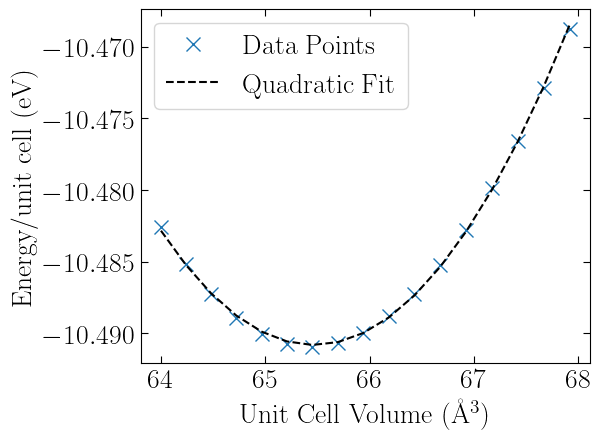

In [342]:

save = False
data = np.loadtxt('data/task_1/energies.csv', delimiter=',')

fig, ax = plt.subplots()

plt.plot(np.power(data[:, 0], 3), data[:, 1] / 64, 'x', ms=10, label='Data Points')
fit = np.polyfit(np.power(data[:, 0], 3), data[:, 1] / 64, 2)
plt.plot(np.power(data[:, 0], 3), np.polyval(fit, np.power(data[:, 0], 3)), 'k--', label='Quadratic Fit')

print(f'The unit cell volume generating the minimum energy is {np.power(-fit[1] / (2 * fit[0]),1):.3f} Å^3')
print(f'The lattice parameter value generating the minimum energy is {np.power(-fit[1] / (2 * fit[0]), 1/3):.3f} Å')

plt.xlabel('Unit Cell Volume (Å$^3$)')
plt.ylabel('Energy/unit cell (eV)')

plt.legend()
plt.tight_layout()
plt.show()

if save:
    save_fig(fig, 'energy_vs_volume', 1)


### Task 2 - Energy Conservation and Temperature

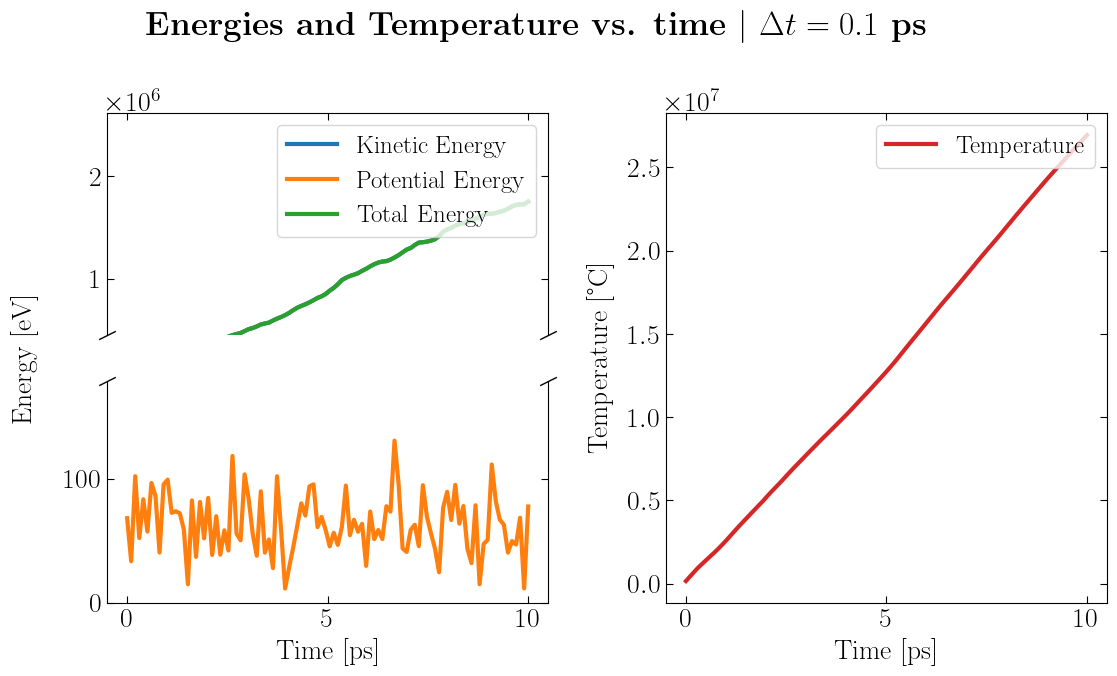

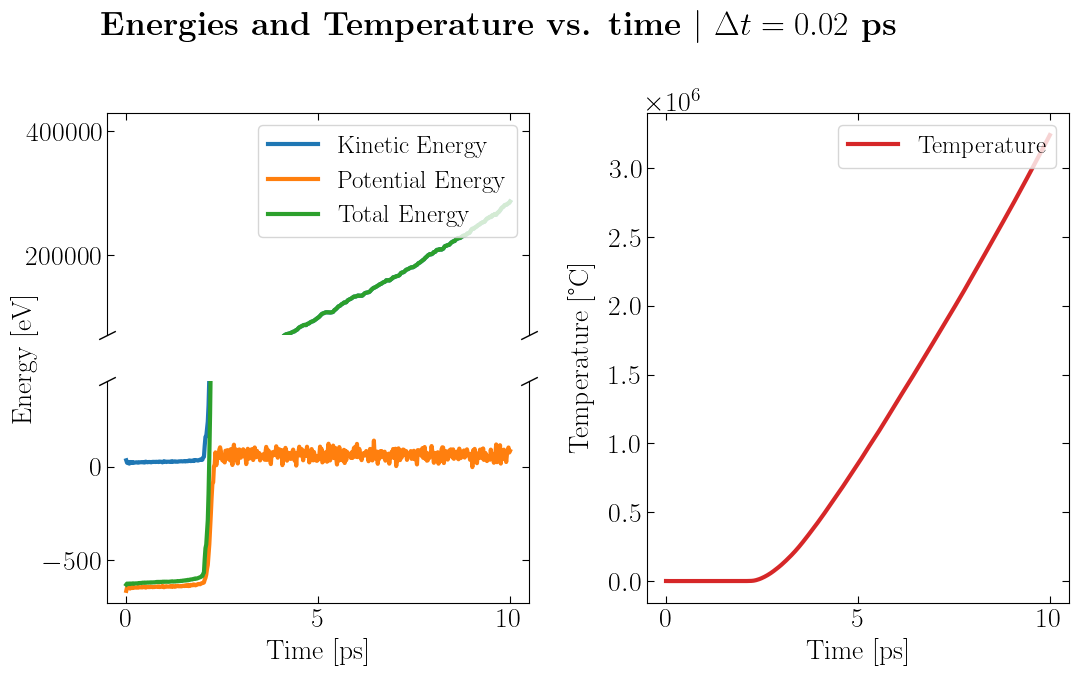

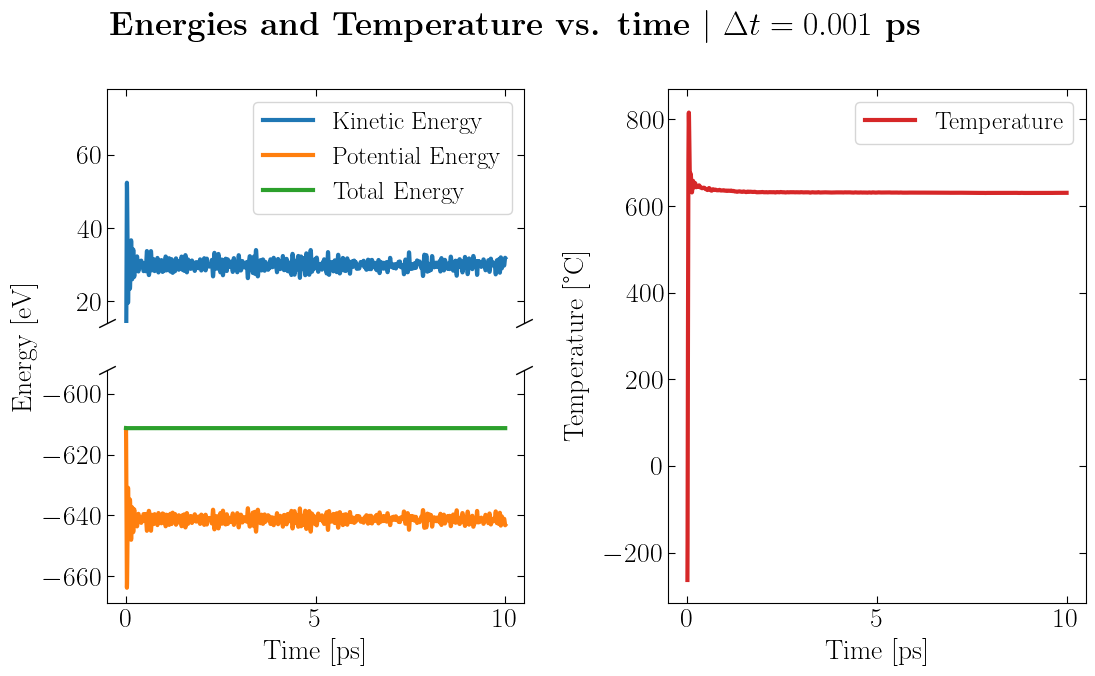

In [ ]:

save = False
t_max = 10
data_01, its_01, t_max_01, delta_t_01, _, _ , _, _ = read_data(0.1, t_max/0.1, 0, 2)
data_005, its_005, t_max_005, delta_t_005, _, _ , _, _ = read_data(0.02, t_max/0.02, 0, 2)
data_0001, its_0001, t_max_0001, delta_t_0001, _, _ , _, _ = read_data(0.001, t_max/0.001, 0, 2)
 
fig_01 = plot_T_E(data_01, its_01, None, t_max_01, delta_t_01)
fig_005 = plot_T_E(data_005, its_005, None, t_max_005, delta_t_005)
fig_0001 = plot_T_E(data_0001, its_0001, None, t_max_0001, delta_t_0001)

if save:
    save_fig(fig_01, 'TE_plot_dt01', 2)
    save_fig(fig_005, 'TE_plot_dt005', 2)
    save_fig(fig_0001, 'TE_plot_dt0001', 2)

### Task 3 - Characteristics of the Solid System

Average temperature: 496.551 °C
Average pressure: 2.095 MPa


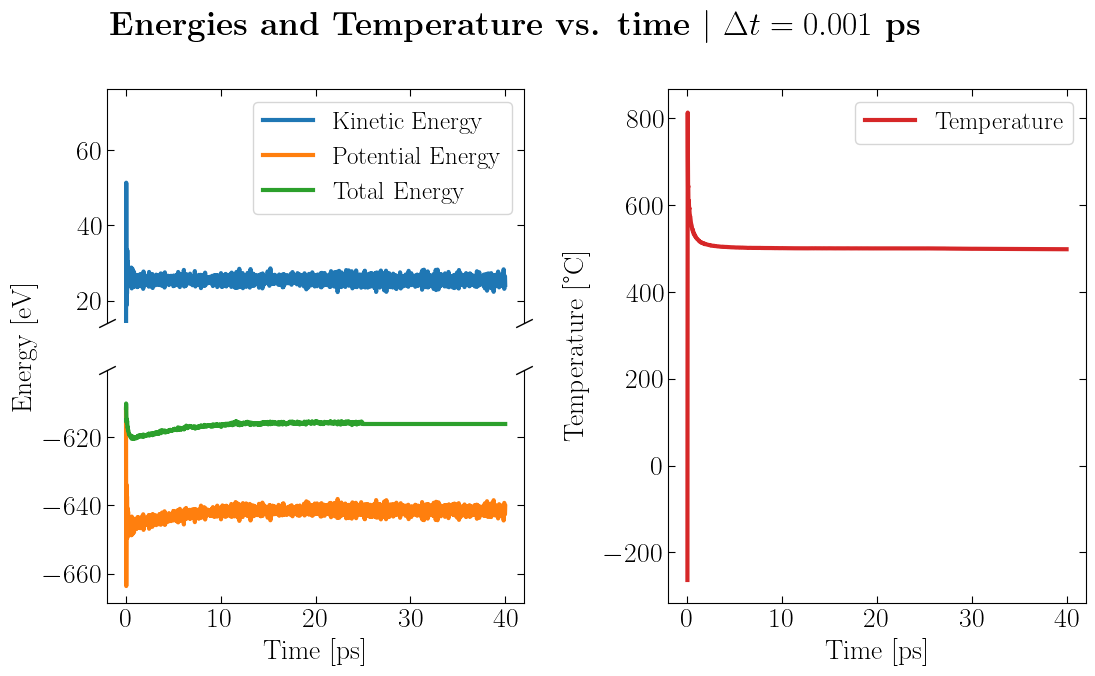

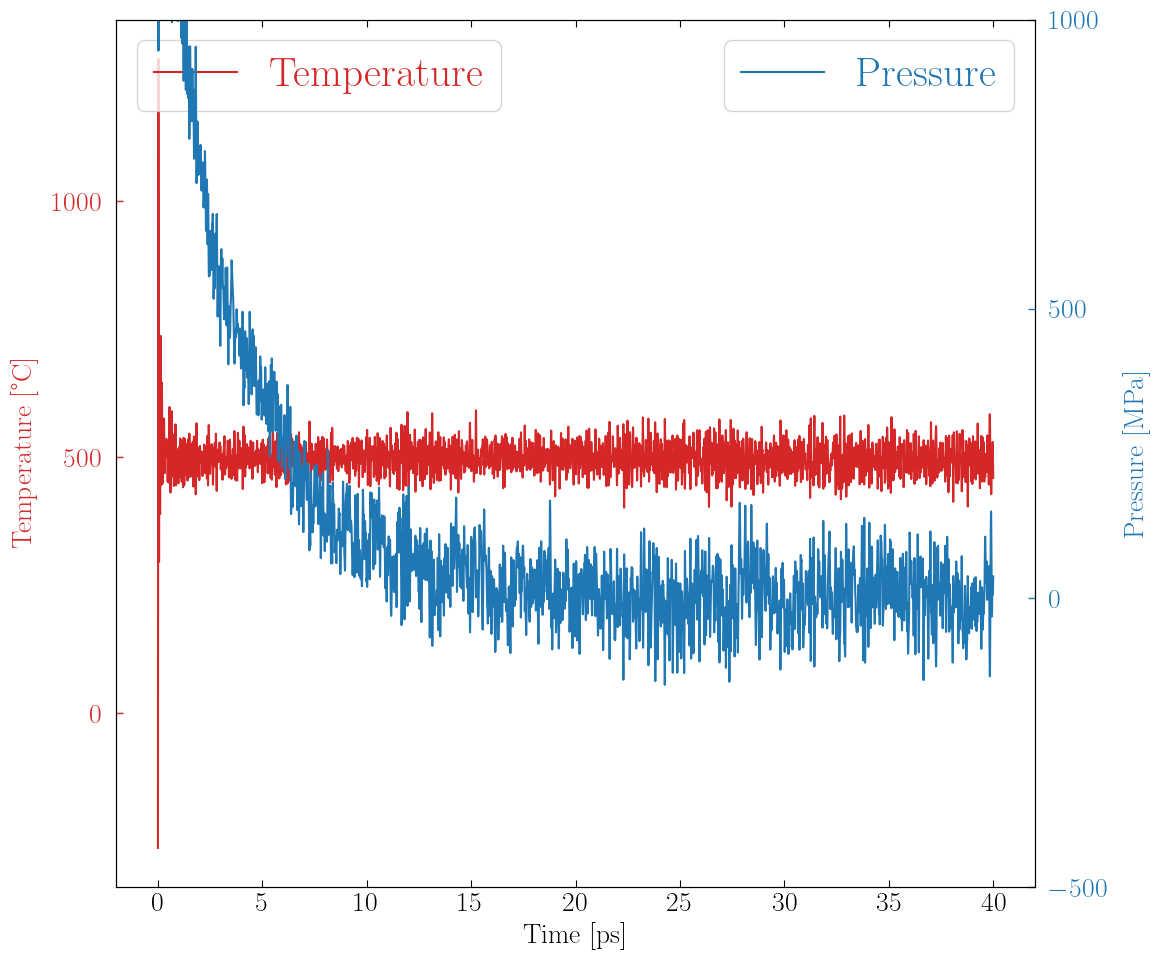

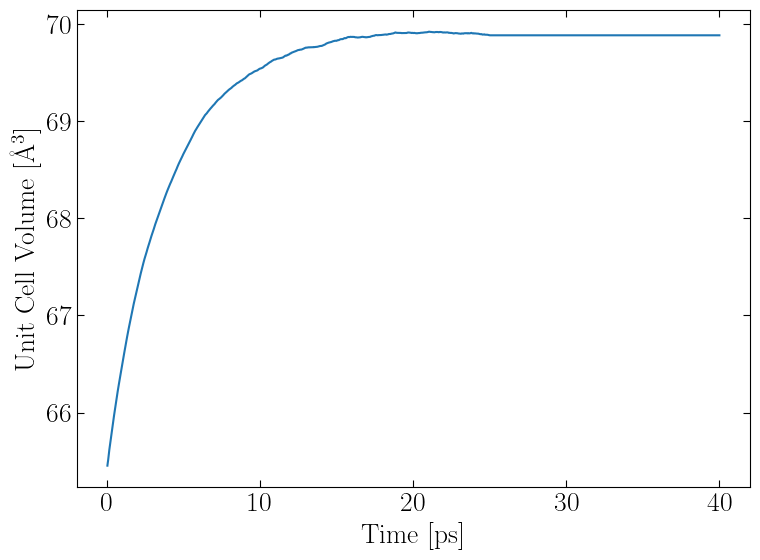

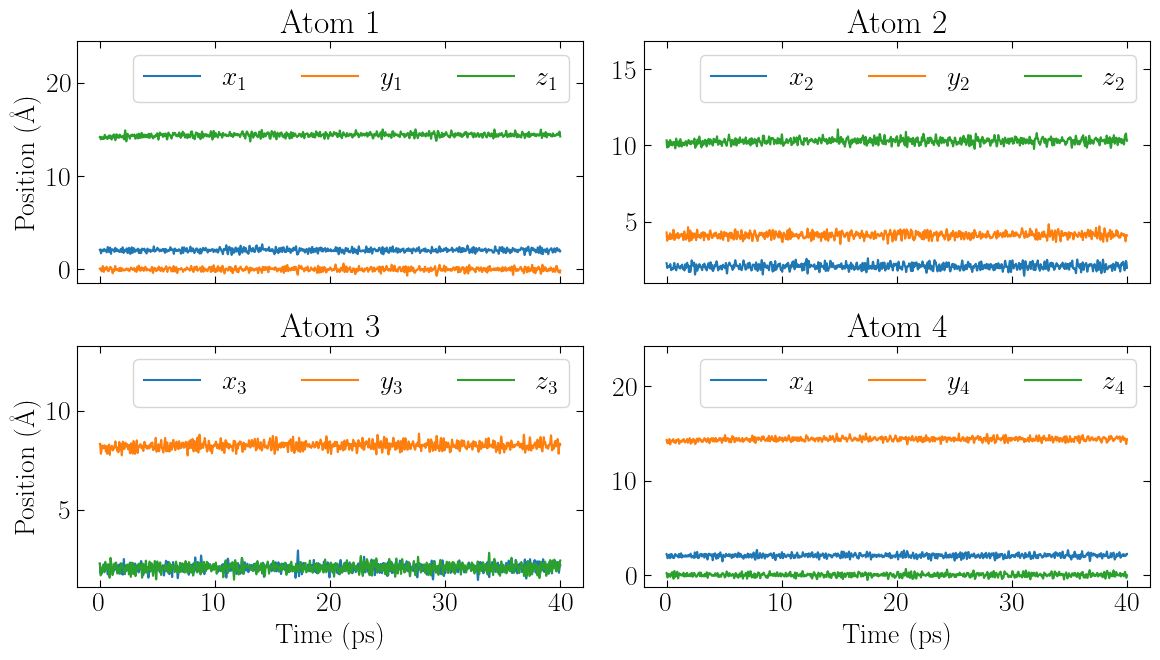

In [26]:

save = False
data, its, t_max, delta_t, its_eq, _, _, _ = read_data(0.001, 40000, 25000, task=3)
# Col 1 = Kinetic Energy, Col 2 = Potential Energy, Col 3 = Total Energy, 
# Col 4 = Temperature AVG, Col 5 = Instantaneous Temperature, Col 6 = Pressure AVG,
# Col 7 = Instantaneous Pressure, Col 8 = Lattice Parameter

fig_TE = plot_T_E(data, its, its_eq, t_max, delta_t)
fig_TP = plot_T_P(data, its_eq)
fig_evo = plot_volume_evo(data, its, t_max, delta_t, its_eq)
fig_trajs = plot_trajs(its_eq, its, t_max, delta_t, task=3)

if save:
    save_fig(fig_TE, 'TE_plot', 3)
    save_fig(fig_TP, 'TP_plot', 3)
    save_fig(fig_evo, 'volume_evo', 3)
    save_fig(fig_trajs, 'trajs_3', 3)

### Task 4 - Trajectories for the Melted System

Average temperature: 699.636 °C
Average pressure: -7.651 MPa


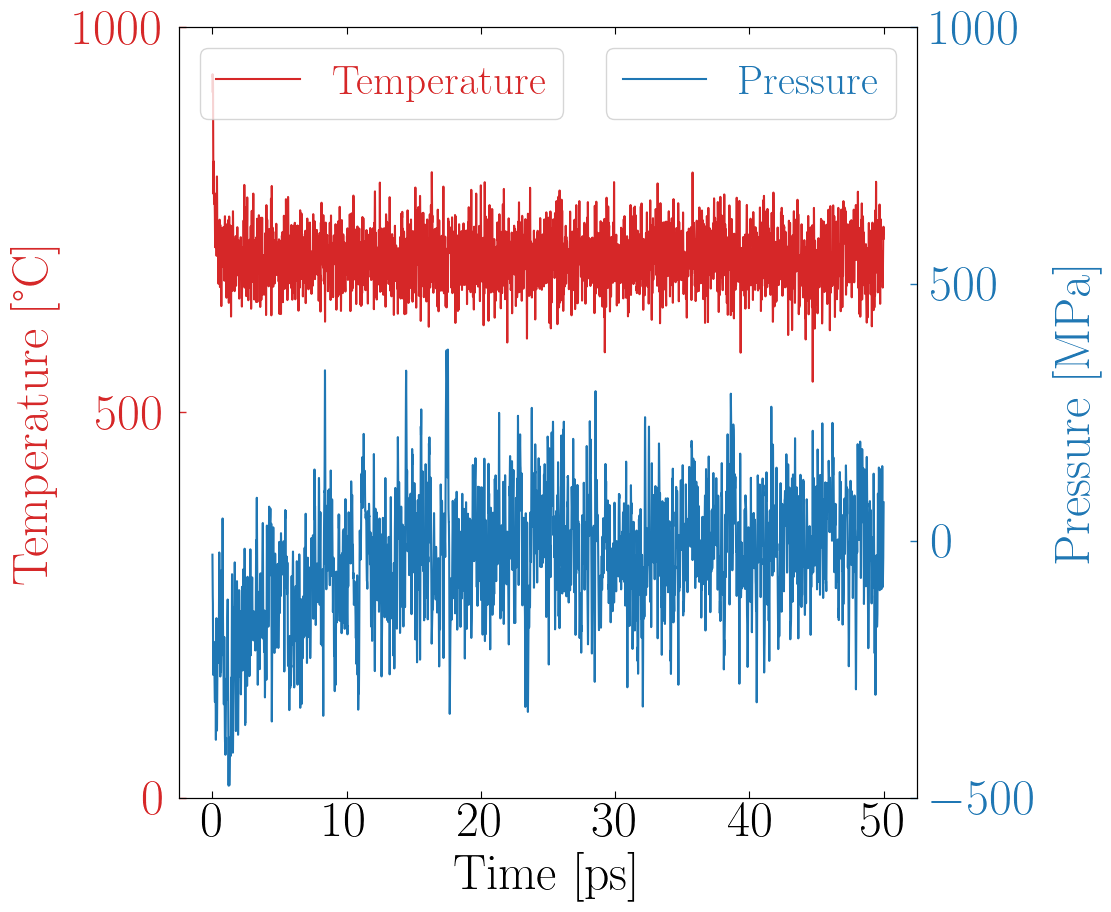

In [22]:

save = False
task = 4
data, its, t_max, delta_t, its_eq, _, _, _ = read_data(0.001, 50000, 30000, task)

# fig_trajs = plot_trajs(its_eq, its, t_max, delta_t, task)
# fig_evo = plot_volume_evo(data, its, t_max, delta_t, its_eq)
# fig_TP = plot_T_P(data, its_eq)
# fig_TE = plot_T_E(data, its, its_eq, t_max, delta_t)

# if save:
#     save_fig(fig, 'trajs_4', task)
#     save_fig(fig_evo, 'volume_evo', task)
#     save_fig(fig_TP, 'TP_plot', task)
#     save_fig(fig_TE, 'TE_plot', task)

data, its, t_max, delta_t, its_eq, _, _, _ = read_data(0.001, 50000, 30000, task)

fig_trajs = plot_trajs(its_eq, its, t_max, delta_t, task)
fig_evo = plot_volume_evo(data, its, t_max, delta_t, its_eq)
fig_TP = plot_T_P(data, its_eq)
fig_TE = plot_T_E(data, its, its_eq, t_max, delta_t)

if save:
    save_fig(fig_trajs, 'warm_up/trajs_4_warmup', task)
    save_fig(fig_evo, 'warm_up/volume_evo_warmup', task)
    save_fig(fig_TP, 'warm_up/TP_plot_warmup', task)
    save_fig(fig_TE, 'warm_up/TE_plot_warmup', task)


### Task 5 - Determination of the Heat Capacity $C_V$

In [ ]:

def avg_fluct_square(data):
    data_avg = np.mean(data)
    d_data = np.mean((data - data_avg)**2)

    return d_data

def calc_CV(data, its_eq, n_atoms, k_B, e):
    T_avg = np.mean(data[its_eq:, 4])
    dE_kin = avg_fluct_square(data[its_eq:, 0])
    dE_pot = avg_fluct_square(data[its_eq:, 1])

    Cv_kin = (3 * n_atoms * k_B / 2) / (1  - 2 / (3 * n_atoms * k_B**2 * T_avg**2) * dE_kin) * e
    Cv_pot = (3 * n_atoms * k_B / 2) / (1  - 2 / (3 * n_atoms * k_B**2 * T_avg**2) * dE_pot) * e

    return Cv_kin, Cv_pot, T_avg, dE_kin, dE_pot

data_3, _, _, _, its_eq_3, _, _, _ = read_data(0.001, 40000, 25000, task=3)
data_4, _, _, _, its_eq_4, _, _, _ = read_data(0.001, 50000, 30000, task=4)

Cv_kin_3, Cv_pot_3, T_avg_3, dE_kin_3, dE_pot_3 = calc_CV(data_3, its_eq_3, n_atoms, k_B, e)
Cv_kin_4, Cv_pot_4, T_avg_4, dE_kin_4, dE_pot_4 = calc_CV(data_4, its_eq_4, n_atoms, k_B, e)

results = pd.DataFrame({'Cv_kin': [Cv_kin_3, Cv_kin_4], 
                       'Cv_pot': [Cv_pot_3, Cv_pot_4], 
                       'dE_kin': [dE_kin_3, dE_kin_4],
                       'dE_pot': [dE_pot_3, dE_pot_4],
                       'T_avg': [T_avg_3, T_avg_4]}, 
                       index=['Solid', 'Liquid'], )
results = results.style.format({"Cv_kin": "{:.3e}",
                              "Cv_pot": "{:.3e}",
                              "dE_kin": "{:.3f}",
                              "dE_pot": "{:.3f}",
                              "T_avg": "{:.3f}"})
display(results)


,Cv_kin,Cv_pot,dE_kin,dE_pot,T_avg
Solid,1.187e-20,1.188e-20,0.932,0.933,768.441
Liquid,9.792e-21,9.797e-21,1.237,1.237,972.489


### Task 6 - Determination of the radial distribution function and coordination number

The coordination number is 12.113


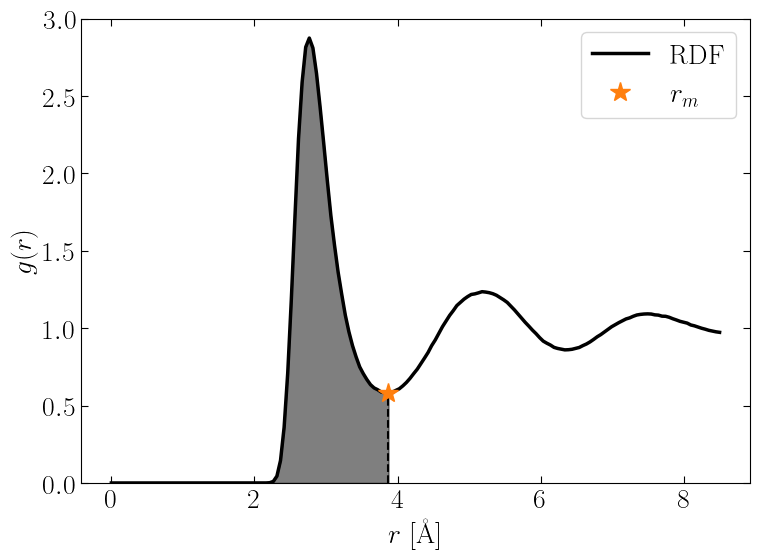

In [30]:

def plot_rdf(r, rdist, r_m, r_m_ind, n, save=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.plot(r, rdist, 'k', label='RDF', lw=2.5)
    plt.axvline(r_m, ymin=0, ymax=0.2, color='k', linestyle='--')
    plt.plot(r[r_m_ind], rdist[r_m_ind], '*', color='tab:orange', markersize=15, label='$r_m$')
    plt.fill_between(r[:r_m_ind+1], rdist[:r_m_ind+1], alpha=0.5, color='k')
    plt.ylim(0, 3)
    plt.xlabel('$r$ [Å]')
    plt.ylabel('$g(r)$')
    plt.legend(loc='upper right')
    plt.tight_layout()

    return fig

save = False
rdist_data, its, t_max, delta_t, its_eq, N_bins, a_0, _ = read_data(0.001, 50000, 30000, 6)
rdist = np.cumsum(rdist_data, axis=0)[-1, :]/len(rdist_data)

r = np.linspace(0, a_0*2, N_bins)
r_m_ind = np.argmin(rdist[50:]) + 50
r_m = r[r_m_ind]
n = n_atoms / np.power(4*a_0, 3)

I_r = 4 * n * np.pi * np.trapezoid(rdist[:r_m_ind] * r[:r_m_ind]**2, r[:r_m_ind])
print(f'The coordination number is {I_r:.3f}')

fig = plot_rdf(r, rdist, r_m, r_m_ind, n)

if save:
    save_fig(fig, 'rdf', 6)


### Task 7 - Determination of the Structure Factor

The first peak of the structure factor is at 1.951 Å$^{-1}$


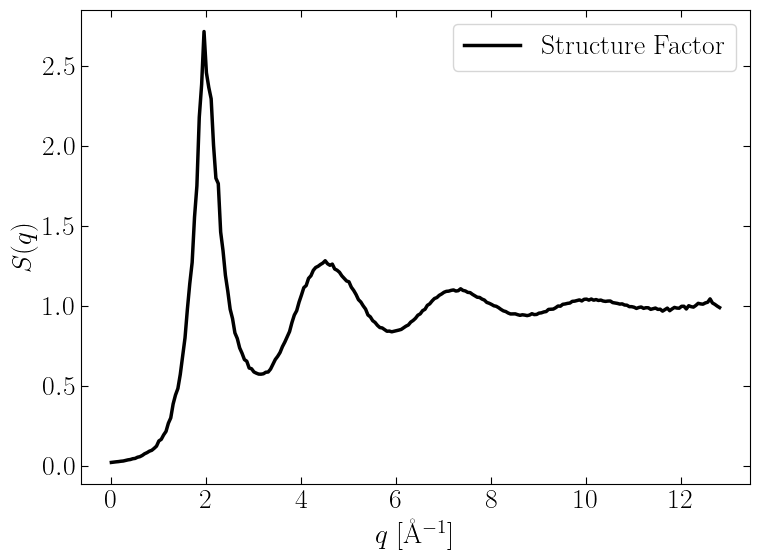

In [ ]:

def plot_sfact(q, sfact):
    fig, ax = plt.subplots(figsize=(8, 6))

    plt.plot(q, sfact, 'k', label='Structure Factor', lw=2.5)

    plt.xlabel('$q$ [Å$^{-1}$]')
    plt.ylabel('$S(q)$')
    plt.legend(loc='upper right')
    plt.tight_layout()

    return fig

save = False
sfact_data, its, _, delta_t, its_eq, N_bins, a_0, N_max = read_data(0.001, 50000, 30000, 7, opt='big')
sfact = np.cumsum(sfact_data, axis=0)[-1, 1:]/len(sfact_data)

q_max = 2 * np.pi / (4*4.25) * N_max * np.sqrt(3)
q = np.linspace(0, q_max, int(N_bins))
print(f'The first peak of the structure factor is at {q[np.argmax(sfact)]:.3f} Å$^{{-1}}$')

fig = plot_sfact(q, sfact)

if save:
    save_fig(fig, 'sfact', 7)
